# Exercise Twelve: Texts, Three Ways
This week was unique as bringing in components (three methods) that were explored previously (topic modeling, sentiment analysis, and Markov chain generation) allowed for the comfort to expand with the enablement of similar root texts.

- Collect and import ten documents (novels work best, but anything goes!)
- Using the topic modeling code as a starter, build a topic model of the documents
- Using the sentiment analysis code as a starter, run a sentiment analysis on sample fragments from the documents and compare
- Using the Markov chain code as a starter, generate a sentence using one of the documents
- Using the Markov chain code as a starter, generate a longer text fragment using all of the documents.

And to help push the technical philosophy further and keep the process moving was knowing that "An interface is a set of cognitive cues. It may look like a screen full of pictures of things inside the computer, but in fact, the interface mediates between an individual the computational activity" (Drucker 176).

## Stage One: Collect and import ten documents (novels work best, but anything goes!)


To keep the direction within my API  perspectives explored this semester, I brought in Wikipedia subjects pertaining to a diverse director focus in the film and entertainment industry. This was a new but warranted area to examine due to practicing something off the grid with a Python app toward finding a minor query. With the help of the path being "director/," I was off and running, as "An interface can connect a person with a computer.., a computer with a computer (as in an API)" (Drucker 172).

In [41]:
import wikipedia
import os
path = "directors/"

Using the film industry's random gathering of directors listed on Wikipedia correctly to locate, the interesting component was that Sean Baker included the (filmmaker) tag but still came through on the choices.  The only option that could not come on board and be documented in Wikipedia correctly was "Sidney Poitier," which signified a "GLITCH... a minor problem – a false or spurious electronic signal - a brief sudden interruption or irregularity" (Benjamin 77). As a result, he had to be replaced with another choice to move forward.  Some of the code was familiar such as the filename and path that used replacements of spaces and underscores, which became readable toward bringing in the list becoming a defined .txt entity within the process and file.  As a result, it enabled saving page content within the director's folder to become a viable entity to explore. Which enlisted "The notion of "cognitive load" (how much mental work is required) is a consideration for all interface design" (Drucker 178).

In [67]:
directors = ["Adam Curtis","Mia Hansen-Love","So Yong Kim","Sean Baker","Steven Spielberg","Angelina Jolie","George Lucas","Jodie Foster","Martin Scorsese","Sofia Coppola","Daniel Myrick","M. Night Shyamalan"]
for director in directors:
    page = wikipedia.page(director)
    print(page.title)
    filename = path + director.replace(" ","_") + ".txt"
    with open (filename, "w", encoding="utf-8", errors="ignore") as f:
        f.write(page.content)
        f.close()

Adam Curtis
Mia Hansen-Løve
So Yong Kim
Sean Baker (filmmaker)
Steven Spielberg
Angelina Jolie
George Lucas
Jodie Foster
Martin Scorsese
Sofia Coppola
Daniel Myrick
M. Night Shyamalan


## Stage Two: Using the topic modeling code as a starter, build a topic model of the documents

Topic modeling aided the directors pulled in were now used as a resource toward a viable topic model presentation.  Ranging from "directors/Adam_Curtis.txt" to "directors/Mia_Hansen-Love.txt," this journey was accomplished, which was stored and represented in the path "directors/" encasing file names. As a result, "Feelings and stories of being surveilled are a form of evidence" (Benjamin 80). While an "Interface is always an argument, and combines presentation (form/format), representation (contents), navigation (wayfinding), orientation (location/breadcrumbs), and connections to the network (links and social media)" (Drucker 181).


In [1]:
import pandas as pd
import os
import numpy as np

documents = []
path = 'directors/'

filenames=sorted([os.path.join(path, fn) for fn in os.listdir(path)])
print(len(filenames)) # count files in corpus
print(filenames[:12]) # print names of 1st 12 files in corpus

17
['directors/Adam_Curtis.txt', 'directors/Angelina_Jolie.txt', 'directors/Annalee_Newitz.txt', 'directors/Charlie_Jane_Anders.txt', 'directors/Daniel_Myrick.txt', 'directors/George_Lucas.txt', 'directors/Jodie_Foster.txt', 'directors/M._Night_Shyamalan.txt', 'directors/Martin_Scorsese.txt', 'directors/Mia_Hansen-Love.txt', 'directors/N.K._Jemisin.txt', 'directors/Octavia_Butler.txt']


Importing sklearn (scikit) learn's CountVectorizer, helps to enhance and organize a document-term matrix. This enables filtering with the removal of "words, in this pedagogical setting to reduce the considerable time required to fit the topic model" (Karsdorp, Kestemont, Riddell 297). 

In [2]:
import sklearn.feature_extraction.text as text

vectorizer=text.CountVectorizer(input='filename', stop_words="english", min_df=1)
dtm=vectorizer.fit_transform(filenames).toarray() # defines document term matrix

vocab=np.array(vectorizer.get_feature_names())

Enforcing 17 articles/documents oddly coming together with the term matrix found in film as “One of the most iconic scenes from The Matrix film trilogy deals with the power of predictions and self-fulfilling prophecies” (Benjamin 84). 

In [70]:
print(f'Shape of document-term matrix: {dtm.shape}. '
      f'Number of tokens {dtm.sum()}')

Shape of document-term matrix: (17, 9581). Number of tokens 42719


In association with the use of the mixture model the "topic-word distributions" there was use of reference of "document-topic distributions" by importing "sklearn.decomposition as decomposition  model = decomposition.LatentDirichletAllocation(  n_components=100, learning_method='online', random_state=1)" (Karsdorp, Kestemont, Riddell 300).  Here 100 topics to create patterns 

In [71]:
import sklearn.decomposition as decomposition
model = decomposition.LatentDirichletAllocation(
    n_components=100, learning_method='online', random_state=1)
document_topic_distributions = model.fit_transform(dtm)
vocabulary = vectorizer.get_feature_names()
# (# topics, # vocabulary)
assert model.components_.shape == (100, len(vocabulary))
# (# documents, # topics)
assert document_topic_distributions.shape == (dtm.shape[0], 100)  

In this section, there was a use to take advantage of a parameter's  topic association with a "vocabulary element... converting the arrays which hold the parameter estimates into DataFrames with named rows and columns.  topic_names = [f'Topic {k}' for k in range(100)]  topic_word_distributions = pd.DataFrame(  model.components_, columns=vocabulary, index=topic_names)" (Karsdorp, Kestemont, Riddell 301). 

In [72]:
topic_names = [f'Topic {k}' for k in range(100)]
topic_word_distributions = pd.DataFrame(
    model.components_, columns=vocabulary, index=topic_names)
print(topic_word_distributions)

               000  0062204707        02  0252061400  0316257442  0345428820  \
Topic 0   0.239674    0.192002  0.193825    0.183861    0.239989    0.189205   
Topic 1   0.186044    0.197449  0.187473    0.193795    0.218828    0.225475   
Topic 2   0.209735    0.194032  0.228112    0.182179    0.217655    0.174812   
Topic 3   0.216428    0.186337  0.191848    0.202245    0.212644    0.184817   
Topic 4   0.199050    0.199901  0.191647    0.209342    0.200201    0.207283   
...            ...         ...       ...         ...         ...         ...   
Topic 95  0.189966    0.210739  0.193293    0.202363    0.231056    0.194162   
Topic 96  0.164812    0.193523  0.238616    0.198727    0.225409    0.210277   
Topic 97  0.210217    0.183445  0.177579    0.214921    0.216195    0.231066   
Topic 98  0.240047    0.232953  0.180106    0.154621    0.183514    0.232676   
Topic 99  1.778020    0.230897  0.212783    0.963061    0.204757    0.183130   

          0345428844  0345455741  03454

This was an exploratory section where I altered the extraction direction through signification of "document_topic_distributions.loc" ['Topic's'] (Karsdorp, Kestemont, Riddell 301). Fame and fortune are represented with wiki research components "The Matrix offers a potent allegory for thinking about power, technology, and society" (Benjamin 84-85). 

In [73]:
topic_word_distributions.loc['Topic 9'].sort_values(ascending=False).head(18)

spielberg    0.453281
film         0.381305
jolie        0.362545
director     0.304452
butler       0.300933
fiction      0.300875
received     0.296121
new          0.292892
ticket       0.289466
1999         0.286045
19           0.285344
rowley       0.284518
motel        0.284273
wing         0.283955
series       0.283368
father       0.282329
best         0.282213
starring     0.281693
Name: Topic 9, dtype: float64

"Word Cloud" generates some frequencies and sees the visually impactful visionary displays as practical strategies for finding the maximum parameters in typical mixture models with "Expectation maximization" is common. The scikit-learn library provides a convenient way of estimating the parameters here as "following lines of code suffice to estimate all the parameters of interest" (Karsdorp, Kestemont, Riddell 291). 

000           0.209735
0062204707    0.194032
02            0.228112
0252061400    0.182179
0316257442    0.217655
0345428820    0.174812
0345428844    0.230549
0345455741    0.182558
0345475732    0.201403
0345494764    0.169955
0345511294    0.243307
036           0.224370
0385535922    0.192044
0393652673    0.197148
0431906335    0.236493
05            0.229661
0517546772    0.236390
08            0.209394
0810949683    0.239243
0814757925    0.217492
Name: Topic 2, dtype: float64


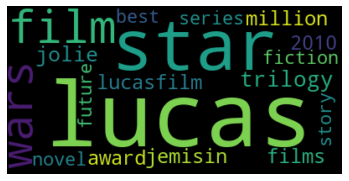

In [74]:
words = topic_word_distributions.loc['Topic 2'].sort_values(ascending=False).head(18)
words 

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

000           0.209735
0062204707    0.194032
02            0.228112
0252061400    0.182179
0316257442    0.217655
0345428820    0.174812
0345428844    0.230549
0345455741    0.182558
0345475732    0.201403
0345494764    0.169955
0345511294    0.243307
036           0.224370
0385535922    0.192044
0393652673    0.197148
0431906335    0.236493
05            0.229661
0517546772    0.236390
08            0.209394
0810949683    0.239243
0814757925    0.217492
Name: Topic 2, dtype: float64


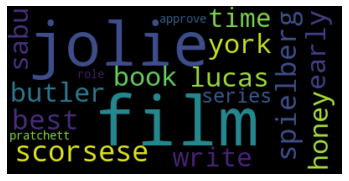

In [75]:
words = topic_word_distributions.loc['Topic 4'].sort_values(ascending=False).head(18)
words 

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [76]:
words = topic_word_distributions.loc['Topic 9'].sort_values(ascending=False).head(18)
words 

spielberg    0.453281
film         0.381305
jolie        0.362545
director     0.304452
butler       0.300933
fiction      0.300875
received     0.296121
new          0.292892
ticket       0.289466
1999         0.286045
19           0.285344
rowley       0.284518
motel        0.284273
wing         0.283955
series       0.283368
father       0.282329
best         0.282213
starring     0.281693
Name: Topic 9, dtype: float64

The use of "plotting, for each year,... can, in effect, calculate the total number of words in  all opinions published in a given year associated with a topic by multiplying  opinion lengths by the estimated topic shares" (Karsdorp, Kestemont, Riddell 315). 

000           0.209735
0062204707    0.194032
02            0.228112
0252061400    0.182179
0316257442    0.217655
0345428820    0.174812
0345428844    0.230549
0345455741    0.182558
0345475732    0.201403
0345494764    0.169955
0345511294    0.243307
036           0.224370
0385535922    0.192044
0393652673    0.197148
0431906335    0.236493
05            0.229661
0517546772    0.236390
08            0.209394
0810949683    0.239243
0814757925    0.217492
Name: Topic 2, dtype: float64


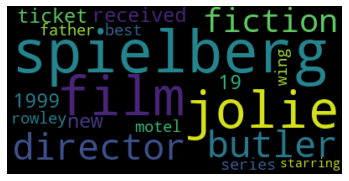

In [77]:


from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Stage Three: Using the sentiment analysis code as a starter, run a sentiment analysis on sample fragments from the documents and compare

The level of fandom in Wikipedia and what goes on the page enabled the analyzer to stand neutral on contributors who chose people they decide to write about as "An interface constructs a narrative" (Drucker 183).

In [78]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dlawb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dlawb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Notes: The compounded polarity of each article simulates differences or similarities of negative or positive sentence components. Filenames were explored locally, with folders created.  In the end, encoding is not concerned about errors and send them to documents, printing them after filenames while checking out differences between large or small.

In [79]:
for filename in filenames:
    with open(filename, encoding="utf-8") as f:
        text = f.read()
        documents.append(text)
        scores = sid.polarity_scores(text[0:500])
    print(filename)
    for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')
    print(' ')

directors/Adam_Curtis.txt
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,  
directors/Angelina_Jolie.txt
compound: 0.8979, neg: 0.0, neu: 0.863, pos: 0.137,  
directors/Annalee_Newitz.txt
compound: 0.4215, neg: 0.0, neu: 0.964, pos: 0.036,  
directors/Charlie_Jane_Anders.txt
compound: 0.9601, neg: 0.022, neu: 0.762, pos: 0.216,  
directors/Daniel_Myrick.txt
compound: -0.6159, neg: 0.139, neu: 0.765, pos: 0.096,  
directors/George_Lucas.txt
compound: 0.8714, neg: 0.04, neu: 0.812, pos: 0.148,  
directors/Jodie_Foster.txt
compound: 0.98, neg: 0.0, neu: 0.722, pos: 0.278,  
directors/M._Night_Shyamalan.txt
compound: 0.296, neg: 0.077, neu: 0.822, pos: 0.101,  
directors/Martin_Scorsese.txt
compound: 0.6801, neg: 0.064, neu: 0.82, pos: 0.116,  
directors/Mia_Hansen-Love.txt
compound: 0.9861, neg: 0.02, neu: 0.655, pos: 0.325,  
directors/N.K._Jemisin.txt
compound: 0.8271, neg: 0.083, neu: 0.752, pos: 0.165,  
directors/Octavia_Butler.txt
compound: -0.3384, neg: 0.068, neu: 0.894, pos: 0.038, 

## Stage Four: Using the Markov chain code as a starter, generate a sentence using one of the documents
Herewith the use of Markov chain code, a sentence from a document became vivid toward a noncontinuous generated text 




In [80]:
import markovify
import random
generator_text = ""

for document in documents:
    generator_text += document

Text pushed through the model to look clean as benefits of "Interface designs often depend upon cultural practices or conventions that may not be legible to users from another background" (Drucker 188).

In [81]:
text_model = markovify.Text(text)
print( text_model.make_sentence() )

He is best known for a distinctive writing style that included a number of game adaptations of his books for younger readers are divided into chapters.


## Stage Five: Using the Markov chain code as a starter, generate a longer text fragment using all of the documents
Achieved a significant moment of generating book novel set up and what words that follow. As many interfaces welcome the use of a "universal" reader with an "omniscient" viewer, "but no such person exists, and each  individual will respond to the contents and the organization of a site in accord with their own background, experience, and expectations" (Drucker 190).




In [82]:
novel = ''
while (len( novel.split(" ")) < 500):
  for i in range(random.randrange(3,9)):
    novel += text_model.make_sentence() + " "
  novel += "\n\n"

print(novel)

A second novel, The Carpet People. The first novel, entitled The Long War, was released on 21 June 2012. Characters and locations reappear throughout the series, The Long Earth was released on 18 June 2013. 

The first novel, The Shepherd's Crown, was published of Pratchett's collected short fiction was published of Pratchett's collected short fiction was published in 1983, after which Pratchett wrote an average of two books a year. Pratchett told Neil Gaiman was involved with the same physics as ours. Terry Pratchett: Back In Black was broadcast on BBC Two on 4 February 2009, drawing 2.6 million viewers and a 6.8% audience share. 

The Discworld is a large amount of fan mail from them. The books are essentially in chronological order, and advancements can be seen in the Top 200.Pratchett received the World Fantasy Award for Non-Fiction. He said he had written a manuscript, The Carpet People, was published in 1983, after which Pratchett wrote by dictating to his assistant, Rob Wilkins,